In [3]:
pip install GitPython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import os
from git import Repo
import matplotlib.pyplot as plt
import urllib
import shutil
%matplotlib inline

In [5]:
import os
from git import Repo

#the local folder for the Git repository
covidfolder = "C:\\Users\\mvash\\Desktop\\covid_19"

if os.path.isdir(covidfolder):
    
    repo = Repo(covidfolder)
    repo.remotes.origin.pull()
else:

    repo = Repo.clone_from('https://github.com/MohitVashisht123/ma22m008_2023_PL.git', covidfolder)


datadir = os.path.join(covidfolder, 'Assignment_9', 'covid_19')


In [11]:
covid = pd.read_csv('01-07-2021.csv')

In [12]:
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-08 05:22:42,33.93911,67.709953,53207,2253,43291,7663,Afghanistan,136.679341,4.234405
1,NaN,NaN,NaN,Albania,2021-01-08 05:22:42,41.15330,20.168300,61705,1223,36535,23947,Albania,2144.172632,1.982011
2,NaN,NaN,NaN,Algeria,2021-01-08 05:22:42,28.03390,1.659600,101382,2792,68589,30001,Algeria,231.196325,2.753941
3,NaN,NaN,NaN,Andorra,2021-01-08 05:22:42,42.50630,1.521800,8348,84,7615,649,Andorra,10804.374555,1.006229
4,NaN,NaN,NaN,Angola,2021-01-08 05:22:42,-11.20270,17.873900,17974,413,11955,5606,Angola,54.688290,2.297763


<ipython-input-18-b9564ecc156f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Last_Update'] = pd.to_datetime(filtered_data['Last_Update'])


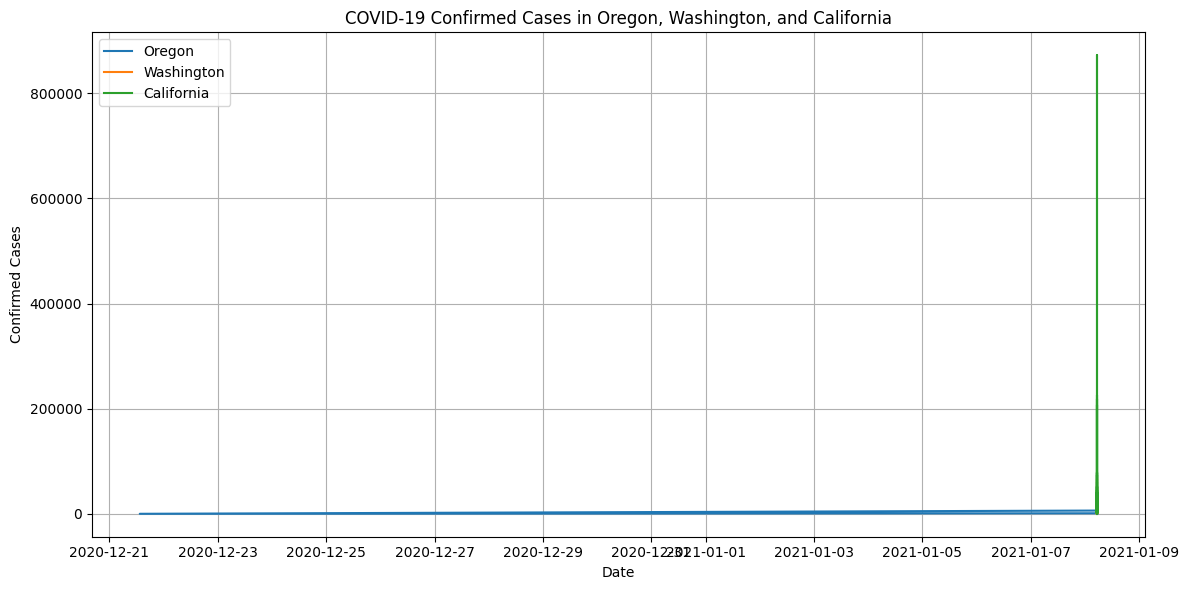

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtering the data for Oregon, Washington, and California
states = ['Oregon', 'Washington', 'California']
filtered_data = covid[covid['Province_State'].isin(states)]

# Making datetime object
filtered_data['Last_Update'] = pd.to_datetime(filtered_data['Last_Update'])

# Creating a time series plot
plt.figure(figsize=(12, 6))
for state in states:
    state_data = filtered_data[filtered_data['Province_State'] == state]
    plt.plot(state_data['Last_Update'], state_data['Confirmed'], label=state)

plt.title('COVID-19 Confirmed Cases in Oregon, Washington, and California')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
